In [1]:
# Load pyspark, pandas
from pyspark import SparkConf, SparkContext
import pandas as pd

In [2]:
# Configure Spark
# 객체 conf 생성
conf = SparkConf().setMaster("local").setAppName("uber-date-trips")
# setMaster("local") : 컴퓨터 하나만 사용하겠다
sc = SparkContext(conf=conf)  # conf라는 이름의 매개변수에 위의 conf 값 삽입

In [3]:
# Dataset sample
filename = "fhvhv_tripdata_2020-03_short.csv"

In [4]:
# Data parsing
lines = sc.textFile("./data/" + filename)   # .csv -> RDD object  RDD 형식으로 변환
header = lines.first()                      # 첫번째 line = columns 명을 header 변수 명에 저장
filtered_lines = lines.filter(lambda row:row != header) # all lines excepting the header
                                            # lambda row : 모든 row가 : 이후의 조건을 만족할 때 
                                                                    # ㄴ (!= 같지 않다)
                                            # filter : spark의 문법, filter로 걸러 filtered_lines에 저장

In [5]:
"""
    Run the Spark job
    - map(): apply the transformation on every element of RDD -> new RDD
    - countByValue(): action that returns the count of each unique value
    - x.split(", ")[2]: extract the value of pickup_datetime from a row
    e.g., 2020-03-01 00:03:40
    - .split(" ")[0]: extract the date from the pickup_datetime
    e.g., 2020-03-01
"""

dates = filtered_lines.map(lambda x: x.split(",")[2].split(" ")[0])   # 한 줄씩 읽어와서 split 2번
result = dates.countByValue()                                         # split() : 워드 단위로 쪼갠다
         # 변수 dates에 값의 수를 세서 result에 저장                   # split(",") : , 단위로 쪼갠다 
                                                                # .split(",")[2] : 2번 index를 가져온다
                                                                # .split(" ") : 공백을 기준으로 쪼갠다
                                                                # .split(" ")[0] : 
                # "countByValue()" 
                # 이전까지는 memory에 생성 계획만 가짐
                # python은 memory에 상주하는 시간을 줄이는 지연 실행이 특징

In [6]:
# Save results as a csv file
pd.Series(result, name="trips").to_csv("./data/trips_date.csv")
                    # result 값을 pandas에 Series로 옮겨 csv 파일에 저장
                    # 해당 셀이 실행 완료 되면 trips_date.csv 파일 생성

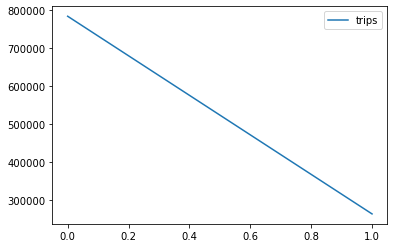

In [7]:
# Visualize the results
import matplotlib.pyplot as plt
              # matplotlib 기본적인 시각화                      
trips = pd.read_csv("./data/trips_date.csv")  # csv 파일 읽기
trips.plot()  # 시각화
plt.show()    # plt = matplotlib 를 해당 셀 첫 줄에 선언 


In [ ]:
# 2020년 3월 첫 주 data
# 본격적으로 코로나 이슈 발발
# 3월 6일에 급 하락세